In [375]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [376]:
GDF = pd.read_csv("GB Analytics Modeling Data.csv")
#GDF = pd.read_csv("GB Analytics Modeling Data Sample.csv")

In [377]:
ginputs_raw = GDF.drop(["ClaimID","Accident DateID","Claim Setup DateID","Report To GB DateID","Employer Notification DateID","Benefits State","Weekly Wage","Employment Status Flag","Max Medical Improvement DateID",
"Post Injury Weekly Wage","HCPCS A Codes","HCPCS B Codes","HCPCS C Codes","HCPCS D Codes","HCPCS E Codes","HCPCS F Codes","HCPCS G Codes","HCPCS H Codes",
"HCPCS I Codes","HCPCS J Codes","HCPCS K Codes","HCPCS L Codes","HCPCS M Codes","HCPCS N Codes","HCPCS O Codes","HCPCS P Codes","HCPCS Q Codes","HCPCS R Codes","HCPCS S Codes",
"HCPCS T Codes","HCPCS U Codes","HCPCS V Codes","HCPCS W Codes","HCPCS X Codes","HCPCS Y Codes","HCPCS Z Codes","ICD Group 1","ICD Group 2","ICD Group 3","ICD Group 4",
"ICD Group 5","ICD Group 6","ICD Group 7","ICD Group 8","ICD Group 9","ICD Group 10","ICD Group 11","ICD Group 12","ICD Group 13","ICD Group 14","ICD Group 15",
"ICD Group 16","ICD Group 17","ICD Group 18","ICD Group 19","ICD Group 20","ICD Group 21","NDC Class - Benzo",
                    "NDC Class - Misc (Zolpidem)", "NDC Class - Muscle Relaxants", "NDC Class - Stimulants", "NCCI Job Code"
                    ],   axis = "columns")   


In [378]:
ginputsall = ginputs_raw.dropna()

In [379]:
gtarget = ginputsall["Opiods Used"]

In [380]:
ginputs = ginputsall.drop(["Opiods Used"
                    ],   axis = "columns")   


In [381]:
from sklearn.preprocessing import LabelEncoder
lble_Accident_State = LabelEncoder()
lble_Industry_ID = LabelEncoder()
lble_Claimant_Age = LabelEncoder()
lble_Claimant_Sex = LabelEncoder()
lble_Claimant_State = LabelEncoder()
lble_Claimant_Marital_Status = LabelEncoder()
lble_Number_Dependents = LabelEncoder()
lble_RTW_Restriction_Flag = LabelEncoder()
lble_Percent_Impairment = LabelEncoder()
#lble_NCCI_Job_Code = LabelEncoder()
lble_Surgery_Flag = LabelEncoder()
lble_Disability_Status = LabelEncoder()
lble_SIC_Group = LabelEncoder()
lble_NCCI_BINatureOfLossDescription = LabelEncoder()
lble_Accident_Source_Code = LabelEncoder()
lble_Accident_Type_Group = LabelEncoder()
lble_Neurology_Payment_Flag = LabelEncoder()
lble_Neurosurgery_Payment_Flag = LabelEncoder()
lble_Dentist_Payment_Flag = LabelEncoder()
lble_Orthopedic_Surgery_Payment_Flag = LabelEncoder()
lble_Psychiatry_Payment_Flag = LabelEncoder()
lble_Hand_Surgery_Payment_Flag = LabelEncoder()
lble_Optometrist_Payment_Flag = LabelEncoder()
lble_Podiatry_Payment_Flag = LabelEncoder()
lble_CPT_Category_Anesthesia = LabelEncoder()
lble_CPT_Category_Eval_Mgmt = LabelEncoder()
lble_CPT_Category_Medicine = LabelEncoder()
lble_CPT_Category_Path_Lab = LabelEncoder()
lble_CPT_Category_Radiology = LabelEncoder()
lble_CPT_Category_Surgery = LabelEncoder()
lble_Opiods_Used = LabelEncoder()

In [382]:
ginputs_n = ginputs

In [383]:
ginputs['Accident_State_N'] = lble_Accident_State.fit_transform(ginputs['Accident State'])
ginputs['Industry_ID_N'] = lble_Industry_ID.fit_transform(ginputs['Industry ID'])
ginputs['Claimant_Age_N'] = lble_Claimant_Age.fit_transform(ginputs['Claimant Age'])
ginputs['Claimant_Sex_N'] = lble_Claimant_Sex.fit_transform(ginputs['Claimant Sex'])
ginputs['Claimant_State_N'] = lble_Claimant_State.fit_transform(ginputs['Claimant State'])
ginputs['Claimant_Marital_Status_N'] = lble_Claimant_Marital_Status.fit_transform(ginputs['Claimant Marital Status'])
ginputs['Number_Dependents_N'] = lble_Number_Dependents.fit_transform(ginputs['Number Dependents'])
ginputs['RTW_Restriction_Flag_N'] = lble_RTW_Restriction_Flag.fit_transform(ginputs['RTW Restriction Flag'])
ginputs['Percent_Impairment_N'] = lble_Percent_Impairment.fit_transform(ginputs['Percent Impairment'])
#ginputs['NCCI_Job_Code_N'] = lble_NCCI_Job_Code.fit_transform(ginputs['NCCI Job Code'])
ginputs['Surgery_Flag_N'] = lble_Surgery_Flag.fit_transform(ginputs['Surgery Flag'])
ginputs['Disability_Status_N'] = lble_Disability_Status.fit_transform(ginputs['Disability Status'])
ginputs['SIC_Group_N'] = lble_SIC_Group.fit_transform(ginputs['SIC Group'])
ginputs['NCCI_BINatureOfLossDescription_N'] = lble_NCCI_BINatureOfLossDescription.fit_transform(ginputs['NCCI BINatureOfLossDescription'])
ginputs['Accident_Source_Code_N'] = lble_Accident_Source_Code.fit_transform(ginputs['Accident Source Code'])
ginputs['Accident_Type_Group_N'] = lble_Accident_Type_Group.fit_transform(ginputs['Accident Type Group'])
ginputs['Neurology_Payment_Flag_N'] = lble_Neurology_Payment_Flag.fit_transform(ginputs['Neurology Payment Flag'])
ginputs['Neurosurgery_Payment_Flag_N'] = lble_Neurosurgery_Payment_Flag.fit_transform(ginputs['Neurosurgery Payment Flag'])
ginputs['Dentist_Payment_Flag_N'] = lble_Dentist_Payment_Flag.fit_transform(ginputs['Dentist Payment Flag'])
ginputs['Orthopedic_Surgery_Payment_Flag_N'] = lble_Orthopedic_Surgery_Payment_Flag.fit_transform(ginputs['Orthopedic Surgery Payment Flag'])
ginputs['Psychiatry_Payment_Flag_N'] = lble_Psychiatry_Payment_Flag.fit_transform(ginputs['Psychiatry Payment Flag'])
ginputs['Hand_Surgery_Payment_Flag_N'] = lble_Hand_Surgery_Payment_Flag.fit_transform(ginputs['Hand Surgery Payment Flag'])
ginputs['Optometrist_Payment_Flag_N'] = lble_Optometrist_Payment_Flag.fit_transform(ginputs['Optometrist Payment Flag'])
ginputs['Podiatry_Payment_Flag_N'] = lble_Podiatry_Payment_Flag.fit_transform(ginputs['Podiatry Payment Flag'])
ginputs['CPT_Category_Anesthesia_N'] = lble_CPT_Category_Anesthesia.fit_transform(ginputs['CPT Category - Anesthesia'])
ginputs['CPT_Category_Eval_Mgmt_N'] = lble_CPT_Category_Eval_Mgmt.fit_transform(ginputs['CPT Category - Eval_Mgmt'])
ginputs['CPT_Category_Medicine_N'] = lble_CPT_Category_Medicine.fit_transform(ginputs['CPT Category - Medicine'])
ginputs['CPT_Category_Path_Lab_N'] = lble_CPT_Category_Path_Lab.fit_transform(ginputs['CPT Category - Path_Lab'])
ginputs['CPT_Category_Radiology_N'] = lble_CPT_Category_Radiology.fit_transform(ginputs['CPT Category - Radiology'])
ginputs['CPT_Category_Surgery_N'] = lble_CPT_Category_Surgery.fit_transform(ginputs['CPT Category - Surgery'])

In [384]:
ginputs_n = ginputs.drop(['Accident State','Industry ID','Claimant Age','Claimant Sex','Claimant State','Claimant Marital Status','Number Dependents',
'RTW Restriction Flag','Percent Impairment','Surgery Flag','Disability Status','SIC Group','NCCI BINatureOfLossDescription',
'Accident Source Code','Accident Type Group','Neurology Payment Flag','Neurosurgery Payment Flag','Dentist Payment Flag','Orthopedic Surgery Payment Flag',
'Psychiatry Payment Flag','Hand Surgery Payment Flag','Optometrist Payment Flag','Podiatry Payment Flag','CPT Category - Anesthesia','CPT Category - Eval_Mgmt',
'CPT Category - Medicine','CPT Category - Path_Lab','CPT Category - Radiology','CPT Category - Surgery'], axis = "columns")

In [385]:
# Split dataset into training set and test set
ginputs_n_train, ginputs_n_test, gtarget_train, gtarget_test = train_test_split(ginputs_n, gtarget, test_size=0.3, random_state = 1) # 70% training and 30% test
from sklearn import tree
gmodel = tree.DecisionTreeClassifier()

In [386]:
# Train Decision Tree Classifer
gmodel.fit(ginputs_n_train, gtarget_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [387]:

gmodel.score(ginputs_n_train,gtarget_train)

1.0

In [388]:
#Predict the response for test dataset
g_pred = gmodel.predict(ginputs_n_test)


In [389]:
g_pred

array([False, False,  True, ..., False,  True, False])

In [390]:
print("Accuracy:",metrics.accuracy_score(gtarget_test, g_pred))

Accuracy: 0.9021081193905239


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.256817 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.256817 to fit



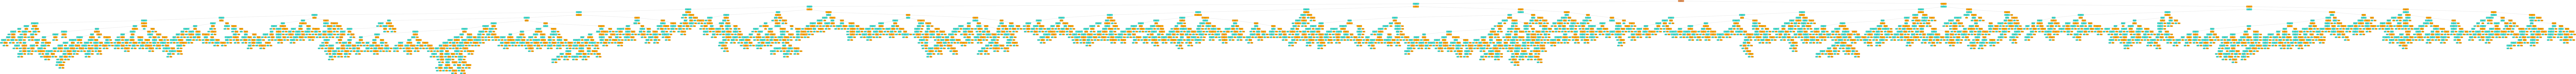

In [391]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.datasets import load_iris
from sklearn import tree
import collections


data_feature_names =  [ 'Accident State','Industry ID','Claimant Age','Claimant Sex','Claimant State','Claimant Marital Status','Number Dependents','RTW Restriction Flag',
'Percent Impairment','Surgery Flag','Disability Status','SIC Group','NCCI BINatureOfLossDescription','Accident Source Code',
'Accident Type Group','Neurology Payment Flag','Neurosurgery Payment Flag','Dentist Payment Flag','Orthopedic Surgery Payment Flag',
'Psychiatry Payment Flag','Hand Surgery Payment Flag','Optometrist Payment Flag','Podiatry Payment Flag','CPT Category Anesthesia',
'CPT Category Eval_Mgmt','CPT Category Medicine','CPT Category Path_Lab','CPT Category Radiology','CPT Category Surgery' ]

dot_data = StringIO()

tree.export_graphviz(gmodel,
                            feature_names=data_feature_names,
                                out_file= dot_data,
                                filled=True,
                                rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('Opiod_Decision_Tree.png')

#export_graphviz(gmodel, out_file='tree.dot', )
#export_graphviz(gmodel, out_file= dot_data, filled=True, rounded=True, special_characters=True,class_names=['0','1'])
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('opiod.png')
Image(graph.create_png())